In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
files = [file for file in os.listdir('./oneminutesoct21')]

octubre = pd.DataFrame()
for file in files:
  df = pd.read_csv('./oneminutesoct21/'+file)
  octubre = pd.concat([octubre, df])

In [3]:
octubre.head()

,TOA5,8543,CR1000X,8543.1,CR1000X.Std.05.01,CPU:Est_meteo1.CR1X,5308,OneMinute
0,TIMESTAMP,RECORD,Irradiance_Avg,T_amb_Avg,RH_Avg,P_atm_Avg,NaN,NaN
1,TS,RN,W/m^2,Deg C,%,mbar,NaN,NaN
2,NaN,NaN,Avg,Avg,Avg,Avg,NaN,NaN
3,2021-10-10 00:00:00,13848,0,16.04,90.5,754.71,NaN,NaN
4,2021-10-10 00:01:00,13849,0,16.04,90.6,754.6997,NaN,NaN


# Arreglando la tabla

In [4]:
octubre.drop(octubre.index[0:3], axis = 0, inplace = True)
octubre.drop(['OneMinute', '5308'],axis='columns', inplace=True)

# Convirtiendolo a float

In [5]:
octubre = octubre.astype({'CR1000X': float, '8543.1':float, 'CR1000X.Std.05.01':float, 'CPU:Est_meteo1.CR1X':float,'8543':float})

# Sacando promedios

In [6]:
prom_rad = octubre['CR1000X'].mean()
prom_Tamb = octubre['8543.1'].mean()
prom_atm = octubre['CPU:Est_meteo1.CR1X'].mean()
proms_octubre = [prom_rad, prom_Tamb,prom_atm]
octubre.describe()

,8543,CR1000X,8543.1,CR1000X.Std.05.01,CPU:Est_meteo1.CR1X
count,44640.000000,44640.000000,44640.000000,44640.000000,44640.000000
mean,23207.500000,202.170226,16.151203,67.373612,753.780243
std,12886.602345,317.707268,3.152302,21.087694,1.473976
min,888.000000,0.000000,9.770000,13.870000,749.702200
25%,12047.750000,0.000000,13.580000,52.077500,752.759100
50%,23207.500000,0.375000,15.480000,67.300000,753.761350
75%,34367.250000,303.125000,18.430000,85.800000,754.785950
max,45527.000000,1321.000000,25.460000,100.000000,758.258600


In [7]:
octubre.to_csv('octubre22.csv', index=False)
mes = 'octubre'
anio = '2021'

# Radiacion octubre

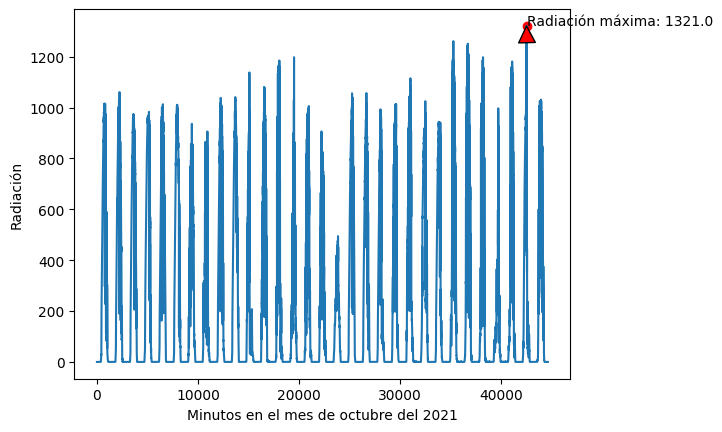

In [8]:
df = pd.read_csv("octubre22.csv")

plt.plot(df.index, df['CR1000X'])

plt.xlabel('Minutos en el mes de '+ mes + ' del ' + anio)
plt.ylabel('Radiación')
max_value = df['CR1000X'].max()
max_index = df['CR1000X'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Max Value')
plt.annotate('Radiación máxima: '+str(max_value), xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

# Temperatura Ambiente octubre

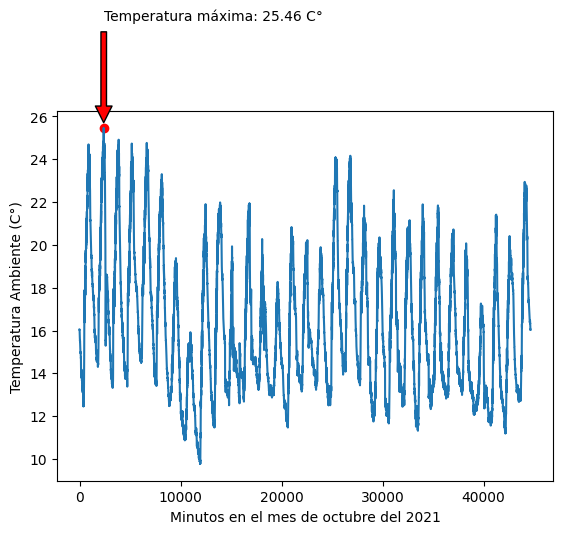

In [9]:

plt.plot(df.index, df['8543.1'])

plt.xlabel('Minutos en el mes de '+ mes + ' del ' + anio)
plt.ylabel('Temperatura Ambiente (C°)')
max_value = df['8543.1'].max()
max_index = df['8543.1'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Max Value')
plt.annotate('Temperatura máxima: '+str(max_value)+ ' C°', xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

# Presion octubre

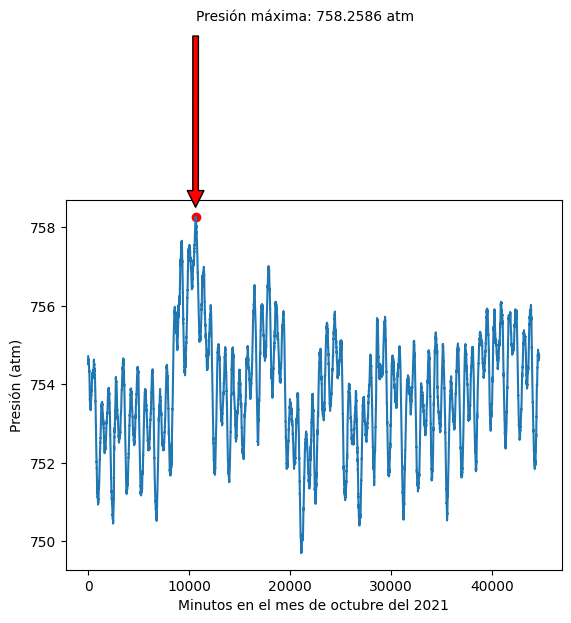

In [10]:

plt.plot(df.index, df['CPU:Est_meteo1.CR1X'])

plt.xlabel('Minutos en el mes de '+ mes + ' del ' + anio)
plt.ylabel('Presión (atm)')
max_value = df['CPU:Est_meteo1.CR1X'].max()
max_index = df['CPU:Est_meteo1.CR1X'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Temperatura máxima')
plt.annotate('Presión máxima: '+str(max_value) + ' atm', xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()